In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
resume_data = pd.read_csv('resume_data.csv')

In [3]:
resume_data.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [5]:
resume_data.tail()

,Category,Resume
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...
961,Testing,Skill Set OS Windows XP/7/8/8.1/10 Database MY...


In [6]:
resume_data.shape

(962, 2)

In [7]:
resume_data.columns

Index(['Category', 'Resume'], dtype='object')

In [8]:
resume_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [9]:
resume_data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [10]:
resume_data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [11]:
resume_data.isnull().any().any()

False

In [12]:
resume_data.nunique()

Category     25
Resume      166
dtype: int64

In [13]:
resume_data['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [14]:
resume_data['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

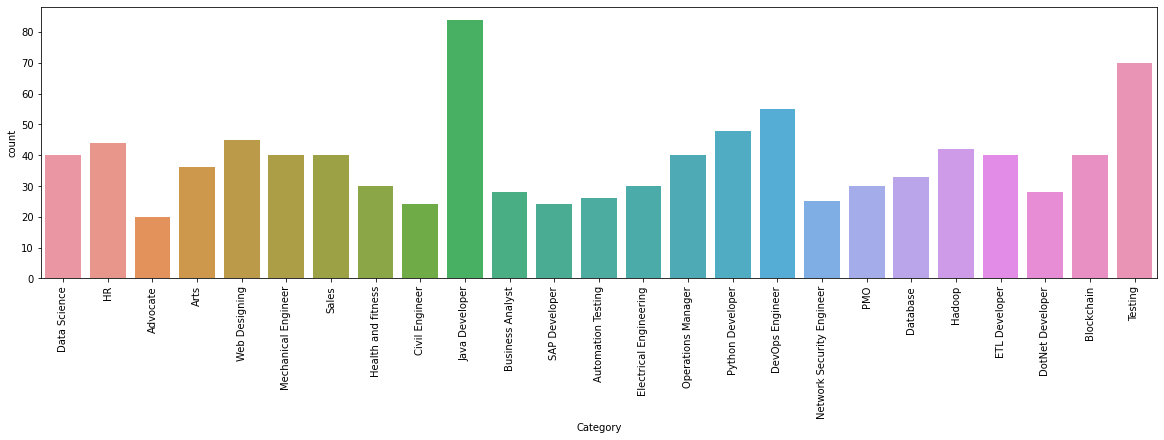

In [15]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data= resume_data)
plt.show()

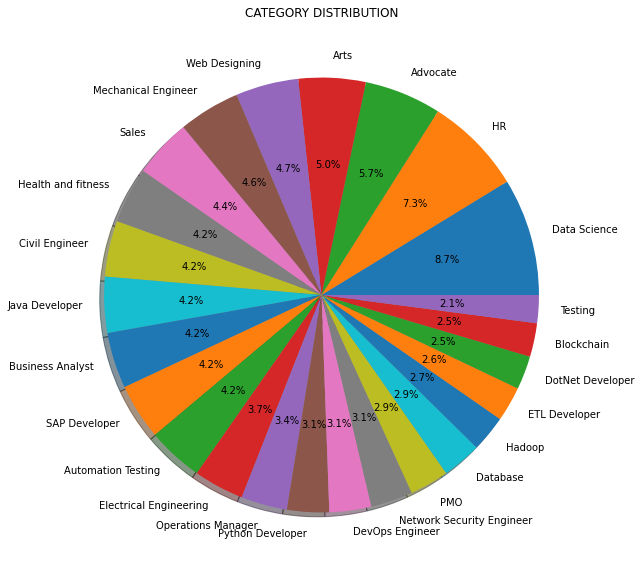

In [16]:
plt.figure(figsize=(30,10))
targetLabels  = resume_data['Category'].unique()
plt.pie(resume_data['Category'].value_counts(), labels = targetLabels,
        autopct='%1.1f%%', shadow=True)
plt.title("CATEGORY DISTRIBUTION")
plt.show()

In [17]:
import re

In [18]:
def cleanResume(resumeText):#data cleaning
    resumeText = re.sub('http\S+\s*', ' ', resumeText)  # remove URLs
    resumeText = re.sub('RT|cc|bcc', ' ', resumeText)  # remove RT and cc
    resumeText = re.sub('#\S+', ' ', resumeText)  # remove hashtags
    resumeText = re.sub('@\S+', ' ', resumeText)  # remove mentions
    resumeText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resumeText)  # remove punctuations
    resumeText = re.sub(r'[^\x00-\x7f]',r' ', resumeText) 
    resumeText = re.sub('\s+', ' ', resumeText)  # remove extra whitespace
    return resumeText
    
resume_data['cleaned_resume'] = resume_data.Resume.apply(lambda x: cleanResume(x))

In [23]:
num = lambda x : x * x 
print(num(5))

25


In [ ]:
# function is a block of statements. In fnction, we ca give
# arguments or parameters.

In [20]:
num = lambda x : x * x + x + 24
print(num(10))

134


In [21]:
def multiply(value):
    return (value * value)
print(multiply(5)) # this is function call

25


In [19]:
resume_data.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [20]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [21]:
SetOfStopWords = set(stopwords.words('english')+['``',"''"])
totalWords =[]
Sentences = resume_data['Resume'].values
cleanedSentences = ""
for records in Sentences:
    cleanedText = cleanResume(records)
    cleanedSentences += cleanedText
    requiredWords = nltk.word_tokenize(cleanedText)
    for word in requiredWords:
        if word not in SetOfStopWords and word not in string.punctuation:
            totalWords.append(word)
    
wordfreqdist = nltk.FreqDist(totalWords)
mostcommon = wordfreqdist.most_common(100)
print(mostcommon)

[('Exprience', 3829), ('months', 3233), ('company', 3130), ('Details', 2967), ('description', 2634), ('1', 2134), ('Project', 1808), ('project', 1579), ('6', 1499), ('data', 1438), ('team', 1424), ('Maharashtra', 1385), ('year', 1244), ('Less', 1137), ('January', 1086), ('using', 1041), ('Skill', 1018), ('Pune', 1016), ('Management', 1010), ('SQL', 990), ('Ltd', 934), ('management', 927), ('C', 896), ('Engineering', 855), ('Education', 833), ('Developer', 806), ('Java', 773), ('2', 754), ('development', 752), ('monthsCompany', 746), ('Pvt', 730), ('application', 727), ('System', 715), ('reports', 697), ('business', 696), ('India', 693), ('requirements', 693), ('I', 690), ('various', 688), ('A', 688), ('Data', 674), ('The', 672), ('University', 656), ('process', 648), ('Testing', 646), ('test', 638), ('Responsibilities', 637), ('system', 636), ('testing', 634), ('Software', 632), ('Technologies', 627), ('S', 622), ('work', 622), ('client', 611), ('like', 608), ('Database', 605), ('per',

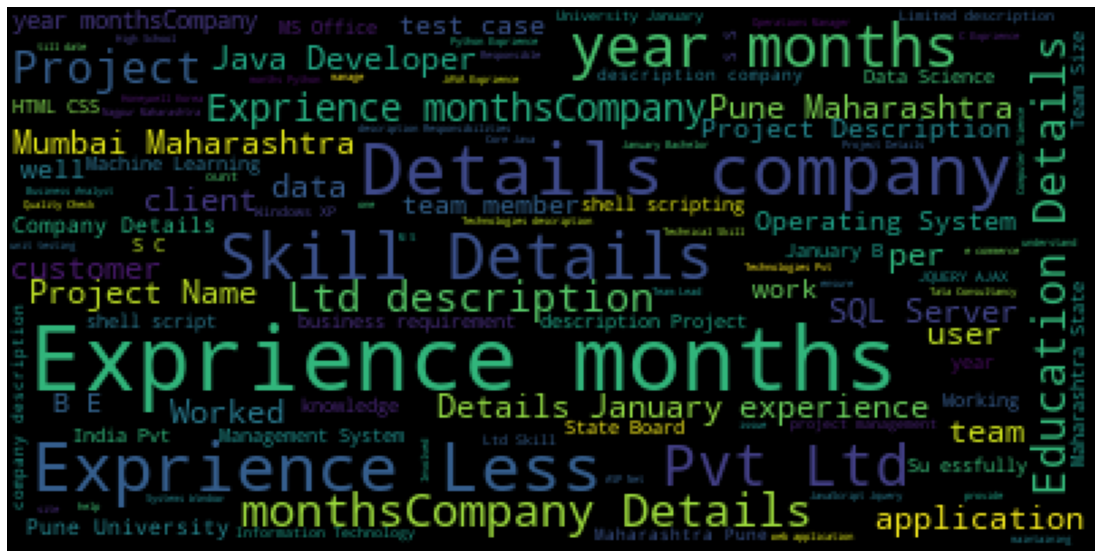

In [22]:
word_cloud = WordCloud().generate(cleanedSentences)
plt.figure(figsize=(30,10))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

In [ ]:
A - 0
B - 1
C - 2
D - 3

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [27]:
data1 = ['Category']
for i in data1:
    resume_data[i] = le.fit_transform(resume_data[i])

In [28]:
resume_data.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [29]:
resume_data.tail()

,Category,Resume,cleaned_resume
957,23,Computer Skills: â¢ Proficient in MS office (...,Computer Skills Proficient in MS office Word B...
958,23,â Willingness to accept the challenges. â ...,Willingness to a ept the challenges Positive ...
959,23,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961,23,Skill Set OS Windows XP/7/8/8.1/10 Database MY...,Skill Set OS Windows XP 7 8 8 1 10 Database MY...


In [30]:
from sklearn.model_selection import train_test_split

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
requiredText = resume_data['cleaned_resume'].values

In [ ]:
# you have converted category into labels. 0,2,3,4,5,6....

In [ ]:
#tf-idf is a feature engineering technique. In which we extract features
# actually we convert text data into numericals vectors.

In [36]:
requiredTarget = resume_data['Category'].values

In [37]:
word_vectorizer = TfidfVectorizer(sublinear_tf=True,
                                  stop_words='english')
word_vectorizer.fit(requiredText)
WordFeatures = word_vectorizer.transform(requiredText)

In [38]:
X_train,X_test,y_train,y_test = train_test_split(WordFeatures,
                                                 requiredTarget,
                                                 random_state=1, 
                                                 test_size=0.2,
                                                 shuffle=True, 
                                                 stratify=requiredTarget)

In [39]:
print(X_train.shape)
print(X_test.shape)

(769, 7351)
(193, 7351)


In [40]:
print(y_train.shape)
print(y_test.shape)

(769,)
(193,)


In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
classifier = KNeighborsClassifier()

In [43]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [44]:
y_pred = classifier.predict(X_test)

In [52]:
print(y_pred)

[ 3 22  1  8  2 18  5  4 23 15  5  3  3 18  3 23  6  1  4 10 12 21  0 18
  9 20 12 12  6 23 18 13 24 16 15  8  3 22  7  9 21 15  6 18 14 24 13  1
  8  2 24 15 23  1 13  7 20  3 23  8 12 23 14 15 13 17  7  7 11 13  5 13
 15 12 10 10 24 12  1 23 12  2  2 23 14 19  8 23 22 21 17 15 16 10 22 10
 14 15 15 24 24 14 22  9 15 23  2  8 16  7  1  7 16 20  3 23 19 21 18 18
 17 17 15 15  8 15  0 24 24  6 10 19 13 23  3 22 16  6  0 17 11 11  1 11
 16  4 13 20  0 20  4  5  6 18 11  8 10  5  9  6 23  8 11 16 19 10 19 15
  9 20  9 20  7 20 22 22 15 20  6  4 24 16 12  8 23 20 12 14 21 15  9 15
 19]


In [53]:
print(y_test)

[ 3 22  1  8  2 18  5  4 23 15  5  3  3 18  3 23  6  1  4 10 12 21  0 18
  9 20 12 12  6 23 18 13 24 16 15  8  3 22  7  9 21 15  6 18 14 24 13  1
  8  2 24 15 23  1 13  7 20  3 23  8 12 23 14 15 13 17  7  7 11 13  5 13
 15 12 10 10 24 12  1 23 12  2  2 23 14 19  8 23 22 21 17 15 16 10 22 10
 14 15 15 24 24 14 22  8 15 23  2  8 16  7  1  7 16 20  3 23 19 21 18 18
 17 17 15 15  8 15  0 24 24  6 10 19 13 23  3 22 16  6  0 17 11 11  1 11
 16  4 13 20  0 20  4  5  6 18 11  8 10  5  9  6 23  8 11 16 19 10 19 15
  9 20  9 20  7 20 22 22 15 20  6  4 24 16 12  8 23 20 12 14 21 15  9 15
 19]


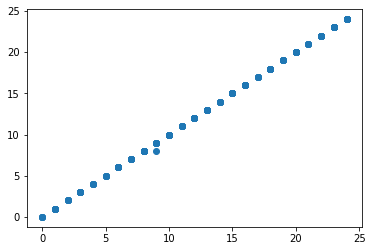

In [48]:
plt.scatter(y_pred, y_test)

In [46]:
print(classifier.score(X_train,y_train))

0.988296488946684


In [47]:
print(classifier.score(X_test,y_test))

0.9948186528497409


In [54]:
from sklearn import metrics

In [56]:
print("\n Classification report for classifier %s:\n%s\n" %(classifier, metrics.classification_report(y_test, y_pred)))


 Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         8
           7       1.00      1.00      1.00         7
           8       1.00      0.91      0.95        11
           9       0.86      1.00      0.92         6
          10       1.00      1.00      1.00         8
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         6
          15       1.00      1.00      1.00        17
          16      